In [1]:
%store -r stage1_bogota0_high_similarity
%store -r stage1_bogota1_high_similarity
%store -r stage1_bogota2_high_similarity
%store -r stage1_bogota3_high_similarity

%store -r stage2_bogota0_high_similarity
%store -r stage2_bogota1_high_similarity
%store -r stage2_bogota2_high_similarity
%store -r stage2_bogota3_high_similarity

%store -r stage3_bogota0_high_similarity
%store -r stage3_bogota1_high_similarity
%store -r stage3_bogota2_high_similarity
%store -r stage3_bogota3_high_similarity

%store -r stage4_bogota0_high_similarity
%store -r stage4_bogota1_high_similarity
%store -r stage4_bogota2_high_similarity
%store -r stage4_bogota3_high_similarity

%store -r stage1_bogota0
%store -r stage1_bogota1
%store -r stage1_bogota2
%store -r stage1_bogota3

%store -r stage2_bogota0
%store -r stage2_bogota1
%store -r stage2_bogota2
%store -r stage2_bogota3

%store -r stage3_bogota0
%store -r stage3_bogota1
%store -r stage3_bogota2
%store -r stage3_bogota3

%store -r stage4_bogota0
%store -r stage4_bogota1
%store -r stage4_bogota2
%store -r stage4_bogota3

In [8]:
stage1_bogota3["user2"].value_counts()

juligarji             40
ofnanezn              40
spenas                40
kgbayala528           40
lgmoralesa            40
ronaldsg20            40
cccristanchoc         40
jmalvarezd            40
smarquezo             40
sarizag               40
Chranium              40
DavidQP               40
afceballosr           40
lizzyt10h             40
NicolasPrr            40
jumcorredorro         40
feartheGru            40
Danielsv9207          40
JhonEmmanuelTorres    40
macuestap             40
capinzor              40
nfmorenog             40
adriel62              40
AFelipeGA             40
mballeng91            40
dduartec              40
srmedinac             40
wilson911013          40
wapiravaguens         40
davidh17              40
DianaNavarrete        40
jdmonroyg             40
jorge52an             40
jscastelblancoh       40
juclopezso            40
afforeroc             40
dagofonseca           40
lacardenasv           40
oacastillol           40
ncampuzano            40


In [7]:
import networkx as nx
import pandas as pd

# Create Graph
G = nx.from_pandas_edgelist(
    stage1_bogota3,
    source='user2',
    target='user1',
    edge_attr='similarity'
)

# Build adjacency matrix
adjacency_df = pd.DataFrame(
    nx.adjacency_matrix(G, weight='similarity').todense(),
    index=G.nodes,
    columns=G.nodes
)

adjacency_df

,juligarji,lemartinp,nfmorenog,AFelipeGA,mballeng91,dduartec,srmedinac,wilson911013,wapiravaguens,davidh17,...,sarizag,Chranium,DavidQP,afceballosr,lizzyt10h,NicolasPrr,jumcorredorro,feartheGru,Danielsv9207,JhonEmmanuelTorres
juligarji,0.000000,0.107143,0.056338,0.029851,0.003356,0.026846,0.049180,0.0,0.022222,0.041667,...,0.027027,0.022059,0.036437,0.032051,0.022222,0.047619,0.037267,0.0,0.0,0.0
lemartinp,0.107143,0.000000,0.291667,0.187500,0.000000,0.172414,0.158730,0.0,0.117647,0.192308,...,0.100000,0.176471,0.078740,0.200000,0.117647,0.166667,0.230769,0.0,0.0,0.0
nfmorenog,0.056338,0.291667,0.000000,0.093023,0.000000,0.215686,0.188235,0.0,0.068182,0.113208,...,0.070175,0.066667,0.122449,0.206897,0.068182,0.125000,0.245902,0.0,0.0,0.0
AFelipeGA,0.029851,0.187500,0.093023,0.000000,0.000000,0.150000,0.068966,0.0,0.600000,0.250000,...,0.157895,0.500000,0.032787,0.068966,0.600000,0.200000,0.121212,0.0,0.0,0.0
mballeng91,0.003356,0.000000,0.000000,0.000000,0.000000,0.000000,0.008658,0.0,0.000000,0.010582,...,0.005208,0.005587,0.013652,0.004975,0.000000,0.000000,0.004831,0.0,0.0,0.0
dduartec,0.026846,0.172414,0.215686,0.150000,0.000000,0.000000,0.182927,0.0,0.075000,0.078431,...,0.096154,0.100000,0.125874,0.269231,0.075000,0.072727,0.333333,0.0,0.0,0.0
srmedinac,0.049180,0.158730,0.188235,0.068966,0.008658,0.182927,0.000000,0.0,0.051724,0.106061,...,0.041667,0.050847,0.059172,0.063291,0.051724,0.100000,0.084337,0.0,0.0,0.0
wilson911013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0
wapiravaguens,0.022222,0.117647,0.068182,0.600000,0.000000,0.075000,0.051724,0.0,0.000000,0.176471,...,0.157895,0.500000,0.024390,0.033333,0.600000,0.142857,0.088235,0.0,0.0,0.0
davidh17,0.041667,0.192308,0.113208,0.250000,0.010582,0.078431,0.106061,0.0,0.176471,0.000000,...,0.109091,0.066667,0.195652,0.272727,0.068182,0.105263,0.357143,0.0,0.0,0.0


In [9]:
adjacency_df.to_csv("adjacency_df.csv")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cities = {'Istanbul':[0,350,329,360,483,1048],
          'Ankara':[350,0,522,405,387,719],
          'Izmir':[329,522,0,186,359,1231],
          'Denizli':[360,405,186,0,174,1082],
          'Antalya':[483,387,359,174,0,981],
          'Erzurum':[1048,719,1231,1082,981,0],
          }
df = pd.DataFrame(cities, index =['Istanbul','Ankara','Izmir','Denizli','Antalya','Erzurum'])
df

,Istanbul,Ankara,Izmir,Denizli,Antalya,Erzurum
Istanbul,0,350,329,360,483,1048
Ankara,350,0,522,405,387,719
Izmir,329,522,0,186,359,1231
Denizli,360,405,186,0,174,1082
Antalya,483,387,359,174,0,981
Erzurum,1048,719,1231,1082,981,0


## Stage 1 Bogota 3

In [2]:
# make unique, sorted, common index
stage1_bogota3['dissimilarity'] = 1 - stage1_bogota3['similarity']
stage1_bogota3 = stage1_bogota3.drop(['similarity'], axis=1)
idx = sorted(set(stage1_bogota3['user1']).union(stage2_bogota3['user2']))

# reshape
df = (stage1_bogota3.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage1_b3 = df
df_stage1_b3

user2,AFelipeGA,Chranium,Danielsv9207,DavidQP,DianaNavarrete,JhonEmmanuelTorres,NicolasPrr,adriel62,afceballosr,afforeroc,...,nfmorenog,oacastillol,ofnanezn,ronaldsg20,sarizag,smarquezo,spenas,srmedinac,wapiravaguens,wilson911013
user1,,,,,,,,,,,,,,,,,,,,,
AFelipeGA,0.000000,1.000000,2.0,1.752927,1.375000,2.0,1.600000,1.500000,1.883415,0.857143,...,1.730506,1.876829,1.383929,1.818182,1.704174,1.166667,1.734848,1.860859,0.800000,2.0
Chranium,1.000000,0.000000,2.0,1.775806,1.444444,2.0,1.727273,1.678571,1.886822,1.333333,...,1.828070,1.891986,1.448529,1.826087,1.656140,1.314286,1.753333,1.899153,1.000000,2.0
Danielsv9207,2.000000,2.000000,0.0,2.000000,2.000000,0.0,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0
DavidQP,1.752927,1.775806,2.0,0.000000,1.858543,2.0,1.810217,1.594186,1.845328,1.701220,...,1.717551,1.754590,1.774621,1.810217,1.798654,1.830025,1.871429,1.813844,1.761324,2.0
DianaNavarrete,1.375000,1.444444,2.0,1.858543,0.000000,2.0,1.791667,1.740260,1.947475,1.545455,...,1.862209,1.908009,1.594737,1.836667,1.803030,1.464286,1.780220,1.918826,1.375000,2.0
JhonEmmanuelTorres,2.000000,2.000000,0.0,2.000000,2.000000,0.0,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0
NicolasPrr,1.600000,1.727273,2.0,1.810217,1.791667,2.0,0.000000,1.638889,1.835548,1.545455,...,1.675000,1.833822,1.740533,1.714286,1.715686,1.809091,1.779352,1.801408,1.714286,2.0
adriel62,1.500000,1.678571,2.0,1.594186,1.740260,2.0,1.638889,0.000000,1.716615,1.464286,...,1.752340,1.819772,1.714286,1.774725,1.686910,1.783333,1.791925,1.363799,1.654102,2.0
afceballosr,1.883415,1.886822,2.0,1.845328,1.947475,2.0,1.835548,1.716615,0.000000,1.773643,...,1.695064,1.770290,1.927778,1.816068,1.717949,1.942276,1.892229,1.783768,1.943411,2.0


In [3]:
stage2_bogota3[stage2_bogota3['user2'] == 'jmalvarezd'].min()

user1           AFelipeGA
user2          jmalvarezd
user1_phase             2
user2_phase             3
similarity            0.0
dtype: object

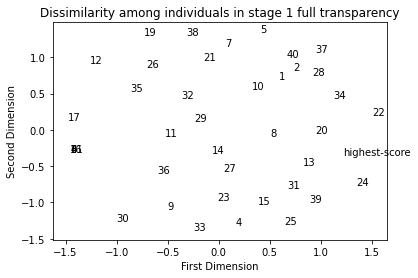

In [4]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage1_b3)  
mds_coords = mds_model.fit_transform(df_stage1_b3) 
                                                                                                                                  
#food_names = df_stage1_b3.columns.tolist()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 'highest-score', 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among individuals in stage 1 full transparency')    
plt.show()

## Stage 2 Bogota 3

In [5]:
# make unique, sorted, common index
stage2_bogota3['dissimilarity'] = 1 - stage2_bogota3['similarity']
stage2_bogota3 = stage2_bogota3.drop(['similarity'], axis=1)
idx = sorted(set(stage2_bogota3['user1']).union(stage2_bogota3['user2']))

# reshape
df = (stage2_bogota3.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_new = df
df_new

user2,AFelipeGA,Chranium,Danielsv9207,DavidQP,DianaNavarrete,JhonEmmanuelTorres,NicolasPrr,adriel62,afceballosr,afforeroc,...,nfmorenog,oacastillol,ofnanezn,ronaldsg20,sarizag,smarquezo,spenas,srmedinac,wapiravaguens,wilson911013
user1,,,,,,,,,,,,,,,,,,,,,
AFelipeGA,0.000000,1.000000,2.0,1.550420,1.250000,2.0,1.600000,1.800000,1.908903,0.857143,...,1.830054,1.919925,1.625000,1.837662,1.724138,1.333333,1.833333,1.859649,0.800000,2.0
Chranium,1.000000,0.000000,2.0,1.642105,1.333333,2.0,1.727273,1.857143,1.910935,1.333333,...,1.877778,1.941192,1.647059,1.843276,1.733333,1.428571,1.840000,1.898305,1.000000,2.0
Danielsv9207,2.000000,2.000000,0.0,2.000000,2.000000,0.0,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0
DavidQP,1.550420,1.642105,2.0,0.000000,1.680672,2.0,1.628736,1.660326,1.763846,1.486842,...,1.784591,1.886761,1.447273,1.718750,1.590090,1.761404,1.825108,1.818599,1.619048,2.0
DianaNavarrete,1.250000,1.333333,2.0,1.680672,0.000000,2.0,1.750000,1.863636,1.958261,1.454545,...,1.882599,1.942388,1.684211,1.853333,1.818182,1.555556,1.851852,1.901639,1.250000,2.0
JhonEmmanuelTorres,2.000000,2.000000,0.0,2.000000,2.000000,0.0,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0
NicolasPrr,1.600000,1.727273,2.0,1.628736,1.750000,2.0,0.000000,1.777778,1.861905,1.545455,...,1.767308,1.876786,1.741935,1.748052,1.666667,1.818182,1.789474,1.800000,1.714286,2.0
adriel62,1.800000,1.857143,2.0,1.660326,1.863636,2.0,1.777778,0.000000,1.783626,1.761905,...,1.617614,1.733041,1.800000,1.862782,1.700000,1.904762,1.862069,1.868132,1.853659,2.0
afceballosr,1.908903,1.910935,2.0,1.763846,1.958261,2.0,1.861905,1.783626,0.000000,1.821870,...,1.830147,1.834754,1.888736,1.849465,1.671778,1.955468,1.901533,1.893569,1.955468,2.0


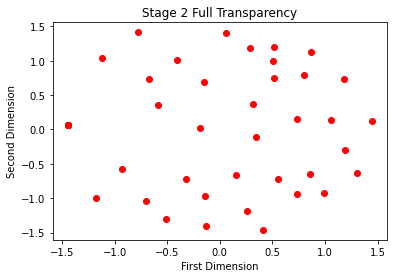

In [6]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_new)  
mds_coords = mds_model.fit_transform(df_new) 
                                                                                                                                  
food_names = stage2_bogota3_high_similarity['user2'].to_list()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'red', edgecolors = 'red')  # points in white (invisible)
#labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 'highest-score', 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
#for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
#    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Stage 2 Full Transparency')    
plt.show()

## Stage 3 Bogota 3

In [7]:
# make unique, sorted, common index
stage3_bogota3_high_similarity['dissimilarity'] = 1 - stage3_bogota3_high_similarity['similarity']
stage3_bogota3_high_similarity = stage3_bogota3_high_similarity.drop(['similarity'], axis=1)
idx = sorted(set(stage3_bogota3_high_similarity['user1']).union(stage3_bogota3_high_similarity['user2']))

# reshape
df = (stage3_bogota3_high_similarity.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage3_b3 = df
df_stage3_b3

user2,AFelipeGA,Chranium,Danielsv9207,DavidQP,DianaNavarrete,JhonEmmanuelTorres,NicolasPrr,adriel62,afceballosr,afforeroc,...,nfmorenog,oacastillol,ofnanezn,ronaldsg20,sarizag,smarquezo,spenas,srmedinac,wapiravaguens,wilson911013
user1,,,,,,,,,,,,,,,,,,,,,
AFelipeGA,0.000000,0.5,0.0,0.000000,0.625,0.0,0.000000,0.000000,0.000000,0.428571,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.8,0.000000
Chranium,0.500000,0.0,0.0,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Danielsv9207,0.000000,0.0,0.0,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
DavidQP,0.000000,0.0,0.0,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.813953,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
DianaNavarrete,0.625000,0.0,0.0,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
JhonEmmanuelTorres,0.000000,0.0,0.0,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
NicolasPrr,0.000000,0.0,0.0,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
adriel62,0.000000,0.0,0.0,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
afceballosr,0.000000,0.0,0.0,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


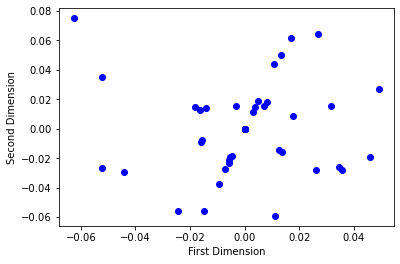

In [8]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage3_b3)  
mds_coords = mds_model.fit_transform(df_stage3_b3) 
                                                                                                                                  
food_names = stage3_bogota3_high_similarity['user2'].to_list()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'blue', edgecolors = 'blue')  # points in white (invisible)
#labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'dagofonesca', 14, 15, 16, 17, 18, 19, 20, 21, 'juligarji', 'highest-score', 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
#labels = food_names
#for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
#    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension') 
#plt.title('Dissimilarity among individuals in stage 3 full transparency')  
plt.show()

## Stage 4 Bogota 3

In [9]:
# make unique, sorted, common index
stage4_bogota3['dissimilarity'] = 1 - stage4_bogota3['similarity']
stage4_bogota3 = stage4_bogota3.drop(['similarity'], axis=1)
idx = sorted(set(stage4_bogota3['user1']).union(stage4_bogota3['user2']))

# reshape
df = (stage4_bogota3.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage4_b3 = df
df_stage4_b3

user2,AFelipeGA,Chranium,Danielsv9207,DavidQP,DianaNavarrete,JhonEmmanuelTorres,NicolasPrr,adriel62,afceballosr,afforeroc,...,nfmorenog,oacastillol,ofnanezn,ronaldsg20,sarizag,smarquezo,spenas,srmedinac,wapiravaguens,wilson911013
user1,,,,,,,,,,,,,,,,,,,,,
AFelipeGA,0.000000,1.000000,2.0,1.886061,1.250000,2.0,1.964025,1.974353,1.802198,0.857143,...,1.846154,1.951967,1.828571,1.930556,1.770968,1.747024,1.833333,1.857143,0.800000,2.000000
Chranium,1.000000,0.000000,2.0,1.916921,1.333333,2.0,1.970403,1.980994,1.806977,1.333333,...,1.888889,1.964420,1.833333,1.931381,1.777439,1.824111,1.840000,1.896552,1.000000,2.000000
Danielsv9207,2.000000,2.000000,0.0,2.000000,2.000000,0.0,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
DavidQP,1.886061,1.916921,2.0,0.000000,1.919168,2.0,1.860104,1.913283,1.768951,1.861536,...,1.821937,1.878760,1.739925,1.815591,1.756048,1.812644,1.909370,1.864784,1.915750,1.943833
DianaNavarrete,1.250000,1.333333,2.0,1.919168,0.000000,2.0,1.973703,1.981217,1.865015,1.454545,...,1.892857,1.964855,1.842105,1.932973,1.846104,1.835882,1.851852,1.900000,1.250000,2.000000
JhonEmmanuelTorres,2.000000,2.000000,0.0,2.000000,2.000000,0.0,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
NicolasPrr,1.964025,1.970403,2.0,1.860104,1.973703,2.0,0.000000,1.961158,1.887210,1.954126,...,1.789228,1.839699,1.909430,1.924530,1.919143,1.916079,1.950118,1.933517,1.973194,1.989647
adriel62,1.974353,1.980994,2.0,1.913283,1.981217,2.0,1.961158,0.000000,1.921338,1.968122,...,1.952496,1.955802,1.949616,1.927701,1.941861,1.962929,1.976854,1.953946,1.980880,1.999799
afceballosr,1.802198,1.806977,2.0,1.768951,1.865015,2.0,1.887210,1.921338,0.000000,1.710465,...,1.701760,1.853486,1.824733,1.809179,1.587894,1.688889,1.863158,1.843531,1.855233,1.952882


In [10]:
stage2_bogota3[stage2_bogota3['user2'] == 'juligarji'].min()

user1            AFelipeGA
user2            juligarji
user1_phase              2
user2_phase              3
dissimilarity     0.992436
dtype: object

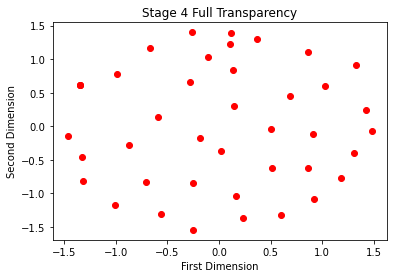

In [11]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage4_b3)  
mds_coords = mds_model.fit_transform(df_stage4_b3) 
                                                                                                                                  
food_names = stage4_bogota3_high_similarity['user2'].to_list()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'red', edgecolors = 'red')  # points in white (invisible)
#labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 'highest-score', 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
#labels = food_names
#for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
#    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension') 
plt.title('Stage 4 Full Transparency')
plt.show()

## Stage 4 Bogota 0

In [12]:
# make unique, sorted, common index 
stage4_bogota0['dissimilarity'] = 1-stage4_bogota0['similarity']
stage4_bogota0 = stage4_bogota0.drop(['similarity'], axis=1)
idx = sorted(set(stage4_bogota0['user1']).union(stage4_bogota0['user2']))

# reshape
df = (stage4_bogota0.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage4_b0 = df
df_stage4_b0

user2,CamiloRueda,CristianLozano,DglyP,JoseMolano,Judgarciani,MogGy94,Moimolcp,NicolasZon,UNhcrodriguezl,annipi,...,katherinsb,leavendanoro,lfvalderrama,maikellPardoA,mnguzmanc,odprietoh,pcberriop,pipemax85,sacastroc,yocuervoc
user1,,,,,,,,,,,,,,,,,,,,,
CamiloRueda,0.000000,1.882353,1.995796,1.935484,1.936206,2.0,1.937404,1.892857,1.954887,2.0,...,1.934065,1.933333,1.883495,2.0,1.977747,1.920792,1.938415,1.945205,1.951806,2.0
CristianLozano,1.882353,0.000000,1.997651,1.886792,1.888320,2.0,1.932371,1.625000,1.935484,2.0,...,1.878692,1.880000,1.909091,2.0,1.981279,1.903226,1.933654,1.878788,1.928992,2.0
DglyP,1.995796,1.997651,0.000000,1.984926,1.990968,2.0,1.988551,1.996873,1.981731,2.0,...,1.960681,1.987789,1.982826,2.0,1.964806,1.989018,1.984025,1.985588,1.980549,2.0
JoseMolano,1.935484,1.886792,1.984926,0.000000,1.836972,2.0,1.855769,1.821429,1.183673,2.0,...,1.949202,1.877029,1.662899,2.0,1.890332,1.881188,1.724423,1.389831,1.767241,2.0
Judgarciani,1.936206,1.888320,1.990968,1.836972,0.000000,2.0,1.874569,1.810174,1.862963,2.0,...,1.956561,1.902468,1.795067,2.0,1.887937,1.892045,1.589734,1.833142,1.836171,2.0
MogGy94,2.000000,2.000000,2.000000,2.000000,2.000000,0.0,2.000000,2.000000,2.000000,0.0,...,2.000000,2.000000,2.000000,0.0,2.000000,2.000000,2.000000,2.000000,2.000000,0.0
Moimolcp,1.937404,1.932371,1.988551,1.855769,1.874569,2.0,0.000000,1.843963,1.838353,2.0,...,1.944749,1.895736,1.861305,2.0,1.927727,1.927441,1.754093,1.867630,1.778499,2.0
NicolasZon,1.892857,1.625000,1.996873,1.821429,1.810174,2.0,1.843963,0.000000,1.804348,2.0,...,1.897387,1.890909,1.885714,2.0,1.950078,1.910448,1.885714,1.837838,1.810644,2.0
UNhcrodriguezl,1.954887,1.935484,1.981731,1.183673,1.862963,2.0,1.838353,1.804348,0.000000,2.0,...,1.955067,1.906851,1.729323,2.0,1.879738,1.884892,1.716614,1.587629,1.754912,2.0


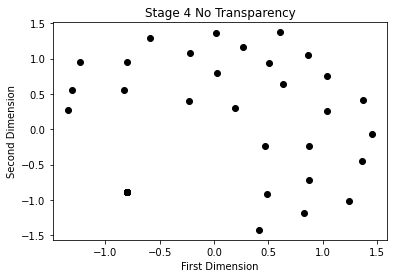

In [13]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage4_b0)  
mds_coords = mds_model.fit_transform(df_stage4_b0) 
                                                                                                                                  
food_names = stage4_bogota0_high_similarity['user2'].to_list()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'black', edgecolors = 'black')  # points in white (invisible)
#labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'highest-score', 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
#for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
#    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Stage 4 No Transparency')    
plt.show()

## Stage 3 Bogota 0

In [14]:
# make unique, sorted, common index 
stage3_bogota0_high_similarity['dissimilarity'] = 1-stage3_bogota0_high_similarity['similarity']
stage3_bogota0_high_similarity = stage3_bogota0_high_similarity.drop(['similarity'], axis=1)
idx = sorted(set(stage3_bogota0_high_similarity['user1']).union(stage3_bogota0_high_similarity['user2']))

# reshape
df = (stage3_bogota0_high_similarity.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage3_b0 = df
df_stage3_b0

user2,CamiloRueda,CristianLozano,DglyP,JoseMolano,Judgarciani,MogGy94,Moimolcp,NicolasZon,UNhcrodriguezl,annipi,...,katherinsb,leavendanoro,lfvalderrama,maikellPardoA,mnguzmanc,odprietoh,pcberriop,pipemax85,sacastroc,yocuervoc
user1,,,,,,,,,,,,,,,,,,,,,
CamiloRueda,0.000000,0.941176,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
CristianLozano,0.941176,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.625000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
DglyP,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.0,0.985309,0.861111,0.000000,0.000000,0.870968,0.0
JoseMolano,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.591837,0.0,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Judgarciani,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,1.459355,0.000000,0.000000,0.0
MogGy94,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Moimolcp,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
NicolasZon,0.000000,1.625000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
UNhcrodriguezl,0.000000,0.000000,0.000000,0.591837,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


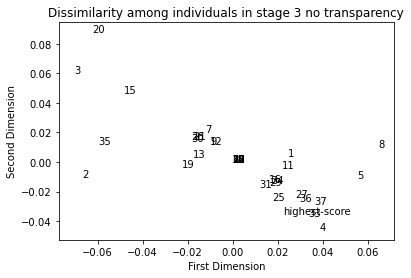

In [15]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage3_b0)  
mds_coords = mds_model.fit_transform(df_stage3_b0) 
                                                                                                                                  
food_names = stage3_bogota0_high_similarity['user2'].to_list()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 'highest-score', 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among individuals in stage 3 no transparency')    
plt.show()

## Stage 2 Bogota 0

In [16]:
# make unique, sorted, common index 
stage2_bogota0_high_similarity['dissimilarity'] = 1-stage2_bogota0_high_similarity['similarity']
stage2_bogota0_high_similarity = stage2_bogota0_high_similarity.drop(['similarity'], axis=1)
idx = sorted(set(stage2_bogota0_high_similarity['user1']).union(stage2_bogota0_high_similarity['user2']))

# reshape
df = (stage2_bogota0_high_similarity.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage2_b0 = df
df_stage2_b0

user2,CamiloRueda,CristianLozano,DglyP,JoseMolano,Judgarciani,MogGy94,Moimolcp,NicolasZon,UNhcrodriguezl,annipi,...,katherinsb,leavendanoro,lfvalderrama,maikellPardoA,mnguzmanc,odprietoh,pcberriop,pipemax85,sacastroc,yocuervoc
user1,,,,,,,,,,,,,,,,,,,,,
CamiloRueda,0.000000,0.941176,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
CristianLozano,0.941176,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.625000,0.000000,0.0,...,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
DglyP,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.891304,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
JoseMolano,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.140152,0.0,...,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Judgarciani,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.0,0.000000,0.000000,1.241865,0.000000,0.000000,0.0
MogGy94,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Moimolcp,0.000000,0.000000,0.891304,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
NicolasZon,0.000000,1.625000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
UNhcrodriguezl,0.000000,0.000000,0.000000,1.140152,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


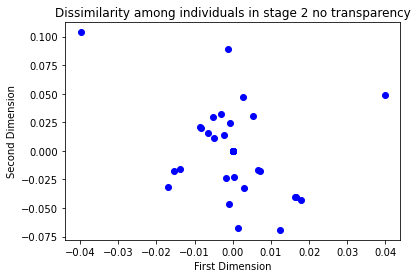

In [17]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage2_b0)  
mds_coords = mds_model.fit_transform(df_stage2_b0) 
                                                                                                                                  
food_names = stage2_bogota0_high_similarity['user2'].to_list()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'blue', edgecolors = 'blue')  # points in white (invisible)
#labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 'highest-score', 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
#for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
#    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among individuals in stage 2 no transparency')    
plt.show()

## Stage 1 Bogota 0

In [18]:
# make unique, sorted, common index 
stage1_bogota0_high_similarity['dissimilarity'] = 1-stage1_bogota0_high_similarity['similarity']
stage1_bogota0_high_similarity = stage1_bogota0_high_similarity.drop(['similarity'], axis=1)
idx = sorted(set(stage1_bogota0_high_similarity['user1']).union(stage1_bogota0_high_similarity['user2']))

# reshape
df = (stage1_bogota0_high_similarity.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage1_b0 = df
df_stage1_b0

user2,CamiloRueda,CristianLozano,DglyP,JoseMolano,Judgarciani,MogGy94,Moimolcp,NicolasZon,UNhcrodriguezl,annipi,...,katherinsb,leavendanoro,lfvalderrama,maikellPardoA,mnguzmanc,odprietoh,pcberriop,pipemax85,sacastroc,yocuervoc
user1,,,,,,,,,,,,,,,,,,,,,
CamiloRueda,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
CristianLozano,0.00000,0.000000,0.000000,0.571429,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
DglyP,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.777778,0.000000,0.000000,0.000000,0.00000,0.0
JoseMolano,0.00000,0.571429,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
Judgarciani,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.235105,0.000000,0.00000,0.0
MogGy94,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
Moimolcp,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
NicolasZon,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
UNhcrodriguezl,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0


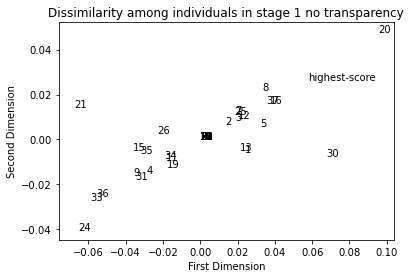

In [19]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage1_b0)  
mds_coords = mds_model.fit_transform(df_stage1_b0) 
                                                                                                                                  
food_names = stage1_bogota0_high_similarity['user2'].to_list()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 'highest-score', 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among individuals in stage 1 no transparency')    
plt.show()

## Stage 1 Bogota 2

In [20]:
# make unique, sorted, common index 
stage1_bogota2_high_similarity['dissimilarity'] = 1-stage1_bogota2_high_similarity['similarity']
stage1_bogota2_high_similarity = stage1_bogota2_high_similarity.drop(['similarity'], axis=1)
idx = sorted(set(stage1_bogota2_high_similarity['user1']).union(stage1_bogota2_high_similarity['user2']))

# reshape
df = (stage1_bogota2_high_similarity.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage1_b2 = df
df_stage1_b2

user2,Dandarprox,Davsatu313,Gantiva,JuanitoAli,JulianaNino,bdvegat,begarzonf,ccvacad,crarojasca,debeltranc,...,kmendezp96,ligibrial,lsfinite,luegilca,mdbelloc,oserasoa,raulramirezp,sagilm,xdanielsb,ykchautai
user1,,,,,,,,,,,,,,,,,,,,,
Dandarprox,0.000000,0.000000,0.727273,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
Davsatu313,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.702703,0.000000,0.0,0.000000,0.000000
Gantiva,0.727273,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.695652
JuanitoAli,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
JulianaNino,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
bdvegat,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.912568,0.0,0.000000,0.000000
begarzonf,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.948164,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
ccvacad,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
crarojasca,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000


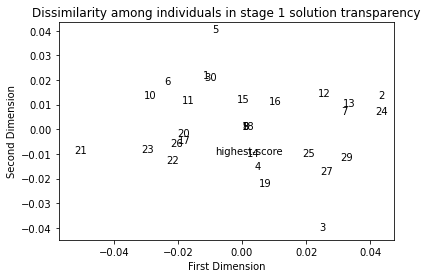

In [21]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage1_b2)  
mds_coords = mds_model.fit_transform(df_stage1_b2) 
                                                                                                                                  
#food_names = df_stage1_b2.columns.tolist()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 'highest-score', 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among individuals in stage 1 solution transparency')    
plt.show()

## Stage 2 Bogota 2

In [22]:
# make unique, sorted, common index 
stage2_bogota2_high_similarity['dissimilarity'] = 1-stage2_bogota2_high_similarity['similarity']
stage2_bogota2_high_similarity = stage2_bogota2_high_similarity.drop(['similarity'], axis=1)
idx = sorted(set(stage2_bogota2_high_similarity['user1']).union(stage2_bogota2_high_similarity['user2']))

# reshape
df = (stage2_bogota2_high_similarity.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage2_b2 = df
df_stage2_b2

user2,CSebasGomez,Dandarprox,Davsatu313,Gantiva,HashNick,JuanitoAli,JulianaNino,Phoenixest,Yelis3,bdvegat,...,ligibrial,lsfinite,luealfonsoru,luegilca,mdbelloc,oserasoa,raulramirezp,sagilm,xdanielsb,ykchautai
user1,,,,,,,,,,,,,,,,,,,,,
CSebasGomez,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Dandarprox,0.0,0.000000,0.000000,1.647619,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Davsatu313,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.790323,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Gantiva,0.0,1.647619,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
HashNick,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.764045,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
JuanitoAli,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.975501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
JulianaNino,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Phoenixest,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Yelis3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.885714,0.000000,0.000000,0.000000,0.000000,0.00000


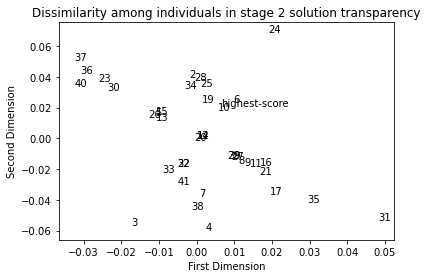

In [23]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage2_b2)  
mds_coords = mds_model.fit_transform(df_stage2_b2) 
                                                                                                                                  
#food_names = df_stage1_b2.columns.tolist()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 'highest-score', 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among individuals in stage 2 solution transparency')    
plt.show()

## Stage 3 Bogota 2

In [24]:
# make unique, sorted, common index 
stage3_bogota2_high_similarity['dissimilarity'] = 1-stage3_bogota2_high_similarity['similarity']
stage3_bogota2_high_similarity = stage3_bogota2_high_similarity.drop(['similarity'], axis=1)
idx = sorted(set(stage3_bogota2_high_similarity['user1']).union(stage3_bogota2_high_similarity['user2']))

# reshape
df = (stage3_bogota2_high_similarity.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage3_b2 = df
df_stage3_b2

user2,CSebasGomez,Dandarprox,Davsatu313,Gantiva,HashNick,JuanitoAli,JulianaNino,Phoenixest,Yelis3,bdvegat,...,ligibrial,lsfinite,luealfonsoru,luegilca,mdbelloc,oserasoa,raulramirezp,sagilm,xdanielsb,ykchautai
user1,,,,,,,,,,,,,,,,,,,,,
CSebasGomez,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Dandarprox,0.0,0.000000,0.000000,1.653627,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Davsatu313,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Gantiva,0.0,1.653627,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HashNick,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JuanitoAli,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,...,0.000000,0.975025,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JulianaNino,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Phoenixest,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Yelis3,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


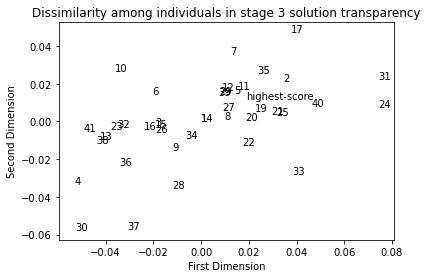

In [25]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage3_b2)  
mds_coords = mds_model.fit_transform(df_stage3_b2) 
                                                                                                                                  
#food_names = df_stage1_b2.columns.tolist()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 'highest-score', 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among individuals in stage 3 solution transparency')    
plt.show()

## Stage 4 Bogota 2

In [26]:
# make unique, sorted, common index 
stage4_bogota2['dissimilarity'] = 1-stage4_bogota2['similarity']
stage4_bogota2 = stage4_bogota2.drop(['similarity'], axis=1)
idx = sorted(set(stage4_bogota2['user1']).union(stage4_bogota2['user2']))

# reshape
df = (stage4_bogota2.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage4_b2 = df
df_stage4_b2

user2,CSebasGomez,Dandarprox,Davsatu313,Gantiva,HashNick,JuanitoAli,JulianaNino,Phoenixest,Yelis3,bdvegat,...,ligibrial,lsfinite,luealfonsoru,luegilca,mdbelloc,oserasoa,raulramirezp,sagilm,xdanielsb,ykchautai
user1,,,,,,,,,,,,,,,,,,,,,
CSebasGomez,0.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
Dandarprox,2.0,0.000000,1.750988,1.669540,1.829190,1.986503,1.770108,1.932149,1.940296,1.978707,...,1.767949,1.988823,1.808258,1.837021,1.811692,1.734399,1.888645,1.840488,1.925302,1.873215
Davsatu313,2.0,1.750988,0.000000,1.696203,1.860000,1.992519,1.758621,1.857143,1.954130,1.987479,...,1.705587,1.993040,1.747748,1.682540,1.703704,1.630556,1.917121,1.773262,1.940945,1.740948
Gantiva,2.0,1.669540,1.696203,0.000000,1.794118,1.988391,1.731343,1.886792,1.925673,1.982713,...,1.734734,1.989360,1.806452,1.789474,1.739130,1.637298,1.900231,1.745130,1.925164,1.780882
HashNick,2.0,1.829190,1.860000,1.794118,0.000000,1.978588,1.894180,1.965909,1.880528,1.969407,...,1.849422,1.979539,1.757576,1.725275,1.806763,1.793204,1.862080,1.834192,1.897329,1.934761
JuanitoAli,2.0,1.986503,1.992519,1.988391,1.978588,0.000000,1.992472,1.997476,1.847244,1.946630,...,1.990006,1.949858,1.986907,1.994169,1.989234,1.986299,1.963491,1.993741,1.971869,1.992918
JulianaNino,2.0,1.770108,1.758621,1.731343,1.894180,1.992472,0.000000,1.777778,1.964818,1.989338,...,1.552227,1.994460,1.800000,1.725490,1.771429,1.726267,1.916175,1.768958,1.944476,1.751639
Phoenixest,2.0,1.932149,1.857143,1.886792,1.965909,1.997476,1.777778,0.000000,1.987846,1.995121,...,1.838859,1.998766,1.931034,1.828571,1.890909,1.883929,1.970830,1.790618,1.980561,1.801383
Yelis3,2.0,1.940296,1.954130,1.925673,1.880528,1.847244,1.964818,1.987846,0.000000,1.957940,...,1.952953,1.967542,1.816040,1.938966,1.822120,1.855067,1.921479,1.867183,1.935651,1.963647


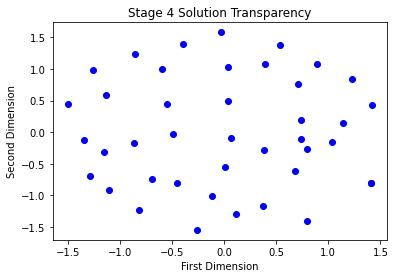

In [27]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage4_b2)  
mds_coords = mds_model.fit_transform(df_stage4_b2) 
                                                                                                                                  
#food_names = df_stage1_b2.columns.tolist()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'blue', edgecolors = 'blue')  # points in white (invisible)
#labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 'highest-score', 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
#for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
#    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Stage 4 Solution Transparency')    
plt.show()

## Stage 4 Bogota 1

In [28]:
# make unique, sorted, common index 
stage4_bogota1['dissimilarity'] = 1-stage4_bogota1['similarity']
stage4_bogota1 = stage4_bogota1.drop(['similarity'], axis=1)
idx = sorted(set(stage4_bogota1['user1']).union(stage4_bogota1['user2']))

# reshape
df = (stage4_bogota1.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage4_b1 = df
df_stage4_b1

user2,Christian7sr,ItsNavi,JairVillalba,Semoralesga,Zeugmax,adamantwharf,aldiazve,andfsanchezlem,anfmorenoso,bdcajicam,...,jonatan360,jsnarvaezb,jsviveroj,jufcontrerasco,maikellPardo,miaborjaac,nabautistal,oeroaq,stevenbustos,wolfstain
user1,,,,,,,,,,,,,,,,,,,,,
Christian7sr,0.000000,2.0,1.900657,1.996965,2.0,1.380000,1.998233,2.0,1.878543,1.871353,...,1.959732,1.912803,1.905841,1.934905,2.0,1.947413,1.844444,1.997923,1.866310,1.971883
ItsNavi,2.000000,0.0,2.000000,2.000000,0.0,2.000000,2.000000,0.0,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,0.0,2.000000,2.000000,2.000000,2.000000,2.000000
JairVillalba,1.900657,2.0,0.000000,1.978859,2.0,1.866667,1.992079,2.0,1.602564,1.514286,...,1.790519,1.436049,1.609524,1.755582,2.0,1.840861,1.692977,1.981305,1.835850,1.849265
Semoralesga,1.996965,2.0,1.978859,0.000000,2.0,1.997384,1.968515,2.0,1.977630,1.985297,...,1.965679,1.973396,1.972455,1.978418,2.0,1.968441,1.987467,0.464704,1.987855,1.966231
Zeugmax,2.000000,0.0,2.000000,2.000000,0.0,2.000000,2.000000,0.0,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,0.0,2.000000,2.000000,2.000000,2.000000,2.000000
adamantwharf,1.380000,2.0,1.866667,1.997384,2.0,0.000000,1.998671,2.0,1.906472,1.833333,...,1.955830,1.911765,1.903125,1.936842,2.0,1.950186,1.566176,1.997915,1.812317,1.974576
aldiazve,1.998233,2.0,1.992079,1.968515,2.0,1.998671,0.000000,2.0,1.992095,1.995594,...,1.983303,1.992111,1.992321,1.993906,2.0,1.987623,1.995377,1.963760,1.994920,1.976999
andfsanchezlem,2.000000,0.0,2.000000,2.000000,0.0,2.000000,2.000000,0.0,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,0.0,2.000000,2.000000,2.000000,2.000000,2.000000
anfmorenoso,1.878543,2.0,1.602564,1.977630,2.0,1.906472,1.992095,2.0,0.000000,1.668687,...,1.714023,1.652598,1.593018,1.784188,2.0,1.874066,1.787287,1.982583,1.618083,1.841050


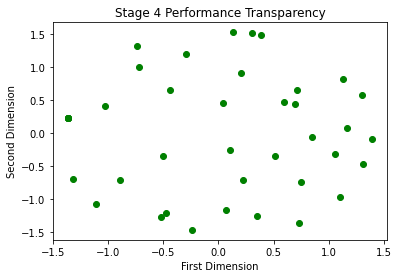

In [29]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage4_b1)  
mds_coords = mds_model.fit_transform(df_stage4_b1) 
                                                                                                                                  
#food_names = df_stage1_b2.columns.tolist()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'green', edgecolors = 'green')  # points in white (invisible)
#labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 'highest-score', 40, 41]
#for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
#    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Stage 4 Performance Transparency')    
plt.show()